In [1]:
import sys, os
import numpy as np

import matplotlib.pyplot as plt

#define directories
rpaper = r'G:\My Drive\Documents\PhD\Modelling\_RiceBall' #ricepaper should be in this directory
datadir = r'G:\My Drive\Documents\PhD\Modelling\_RiceBall\ricepaper\test_notebooks\test_data' #directory to load data from
os.chdir(rpaper)

In [2]:
#import ricepaper classes
from ricepaper.reader import RiceBall

RiceBall Reader
------

RiceBall reader can be used to load any *.OUT* file created by RiceBall. Here we load a sandpile model and define particle radii for visualisation (as these are not stored in the ouput).

In [3]:
os.chdir(datadir)
#pile = RiceBall('settled_layers_w_friction.OUT',radii={1:30,2:25,3:20},density={1:2500,2:2500,3:2500})
#pile = RiceBall('settled_layers_no_friction.OUT',radii={1:30,2:25,3:20},density={1:2500,2:2500,3:2500})
pile = RiceBall('settled_pile.OUT',radii={1:60,2:50,3:40},density={1:2500,2:2500,3:2500})

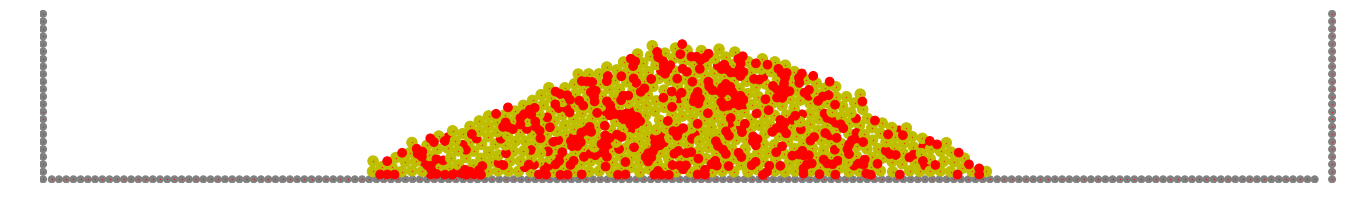

Model contains 1022 nodes and 1632 interactions



In [4]:
pile.quickPlot()
print("Model contains %d nodes and %d interactions\n" % (pile.nBalls(),pile.nInteractions()))

Preliminary Analyses
========

After loading the output we can start to explore the energy of particles in the sytem (is everything at rest?) and the forces they are subject to.

In [5]:
#get all basic attributes (mainly to test they all work!)
pid,pos,vel,spe,mass,dens,rad,vol,kin = pile.getAttributes(["pos","vel","spe",
                                        "mass","dens","rad","vol","kin"])

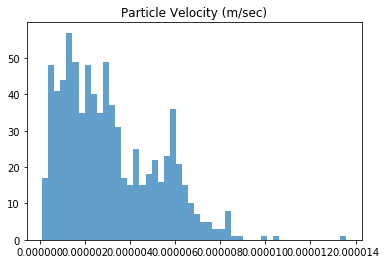

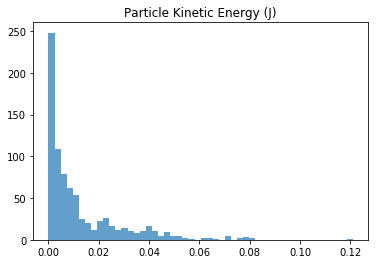

In [6]:
#do some plots
plt.hist(spe,bins=50,alpha=0.7)
plt.title("Particle Velocity (m/sec)")
plt.show()

plt.hist(np.array(kin),bins=50,alpha=0.7)
plt.title("Particle Kinetic Energy (J)")
plt.show()

In [7]:
print("Median Velocity (m/sec): ", np.median(spe))
print("Median kinetic energy (J)", np.median(np.array(kin)))

Median Velocity (m/sec):  2.6851075273634803e-06
Median kinetic energy (J) 0.006179658770837662


The histograms and the median velocity/kinetic energy values suggest that the sytem is largely in equillibrium. The plot at the end of the previous notebook also suggests this.

Per-particle forces
----------------------------

Given the equillibrium state, we can start investigating per-particle forces to explore the state of stress within the pile. Dynamic properties of particles can be retrieved using the getAttributes(...) function.

In [8]:
pid, force, torque, acc = pile.getAttributes(["force","torque","acc"])

First we find and plot unbalanced particles; which we define as particles undergoing accelerations of > 0.1 m/sec. There are not many of these, suggesting the system is largely static. 

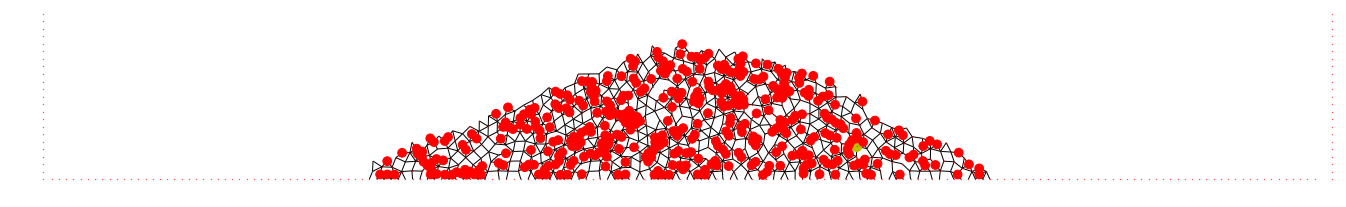

In [9]:
#show unbalanced particles
pile.plotUnbalanced( 0.1 )

We will also create a histogram of resultant force magnitudes and net torque, a similar way to look at the overall stability of the system (the resultant forces/torques on all particles in a perfectly stable assemblage should be zero). 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


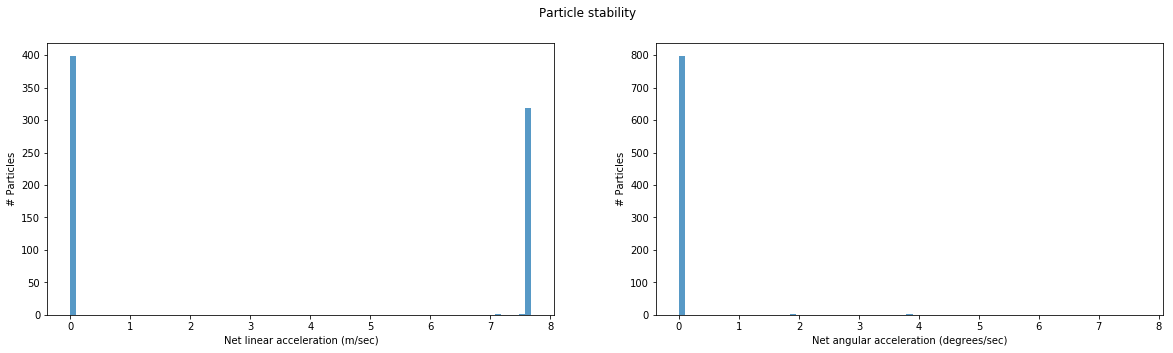

In [10]:
pile.plotNetAcc()

As we have convinced ourselves that the assemblage is (largely) at rest, we can derive quasi-continuum properties such as per-particle stresses:

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


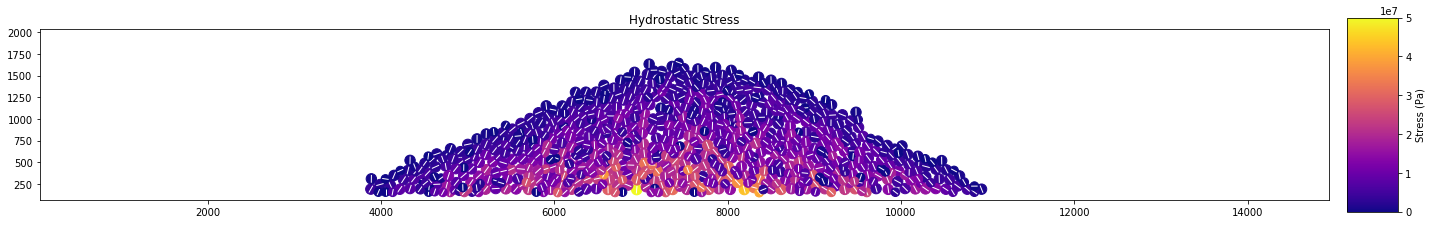

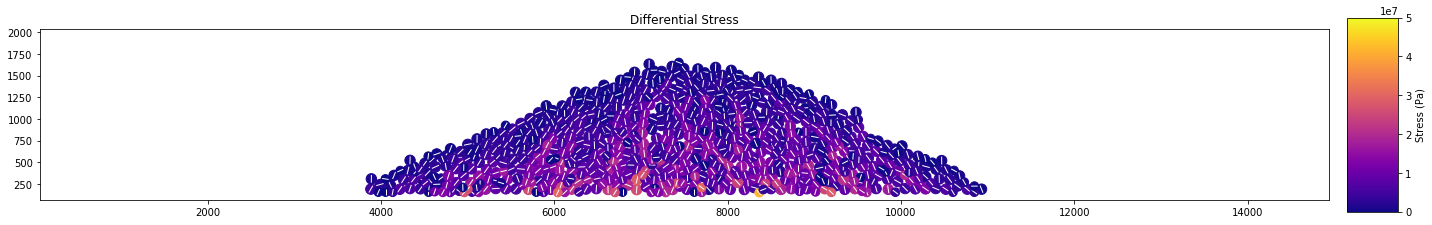

In [11]:
#plot hydrostatic stress
fig, ax = pile.plotStress(type="mean",vmax=5e7, title="Hydrostatic Stress", figSize = (20,15))

#plot deviatoric stress
fig, ax = pile.plotStress(type="dev",vmax=5e7, title="Differential Stress", figSize = (20,15))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


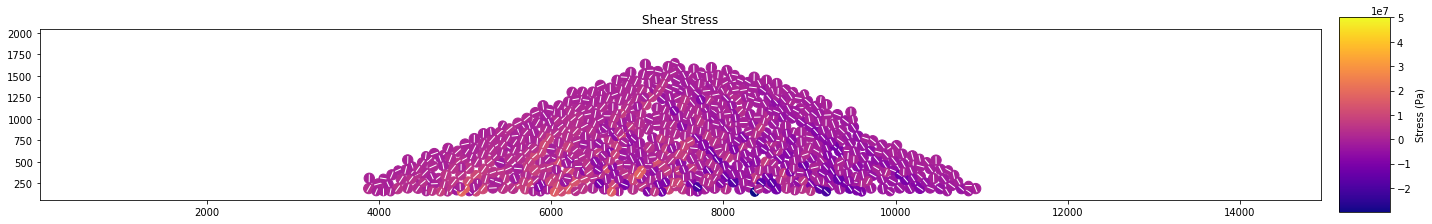

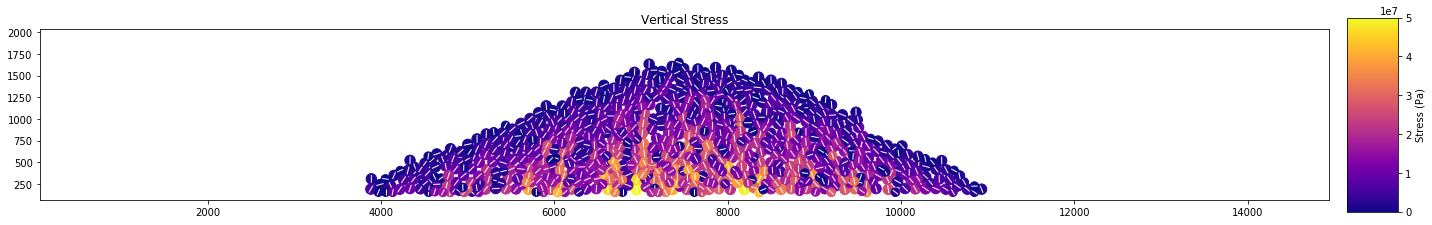

In [12]:
#plot shear stress
fig, ax = pile.plotStress(type="sx",vmax=5e7, title="Shear Stress", figSize = (20,15))

#plot normal stress (in y-direction)
fig, ax = pile.plotStress(type="ny",vmax=5e7, title="Vertical Stress", figSize = (20,15))

The visualisations above, especially of the vertical stress, make it obvious that spontaneously formed "force-chains" in the particle assemblage carry most of the load. The spacing of these will depend on the particle size, hence it can be useful to average the stress tensors over multiple particles in order to approximate a continuum stress. This can be done using the **average_stress(...)** function (noting that this overwrites previously calculated stress tensors and associated derivatives).

In [13]:
pile.average_stress(n = 5)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


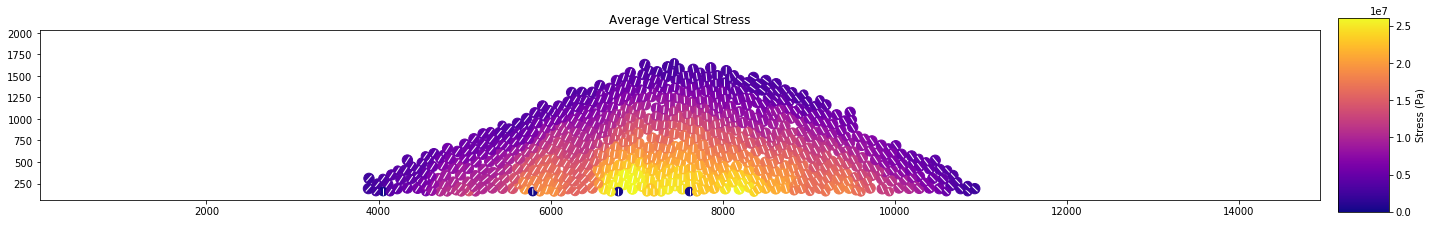

In [14]:
#plot normal stress (in y-direction)
fig, ax = pile.plotStress(type="ny",title="Average Vertical Stress", figSize = (20,15))

In [15]:
#finally, we export this to vtk for viewing in paraview or similar
pile.writeVTK("pile_processesed3.vtk")